<a href="https://colab.research.google.com/github/Loga19818eeanvesh/TensorFlow_Assignments/blob/main/c1w1_a1_Wine_Quality_And_Wine_type_prediction_Multiple_Output_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow==2.2.0

     |████████████████████████████████| 516.2 MB 3.6 kB/s 
     |████████████████████████████████| 3.0 MB 38.1 MB/s 
     |████████████████████████████████| 2.9 MB 36.9 MB/s 
     |████████████████████████████████| 454 kB 49.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalli

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input,Dropout

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [3]:
# URL of the white wine dataset
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# load the dataset from the URL
white_df = pd.read_csv(URL, sep=";")

# fill the `is_red` column with zeros.
white_df["is_red"] = 0

# keep only the first of duplicate items
white_df = white_df.drop_duplicates(keep='first')

In [5]:
print(white_df.alcohol[0])
print(white_df.alcohol[100])

8.8
9.1


In [6]:
# URL of the red wine dataset
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

# load the dataset from the URL
red_df = pd.read_csv(URL, sep=";")

# fill the `is_red` column with ones.
red_df["is_red"] = 1

# keep only the first of duplicate items
red_df = red_df.drop_duplicates(keep='first')

In [7]:
print(red_df.alcohol[0])
print(red_df.alcohol[100])


9.4
10.2


In [19]:
print(red_df[['alcohol']])

      alcohol
0         9.4
1         9.8
2         9.8
3         9.8
5         9.4
...       ...
1593      9.5
1594     10.5
1595     11.2
1597     10.2
1598     11.0

[1359 rows x 1 columns]


In [20]:
print(red_df.loc[0])

fixed acidity            7.4000
volatile acidity         0.7000
citric acid              0.0000
residual sugar           1.9000
chlorides                0.0760
free sulfur dioxide     11.0000
total sulfur dioxide    34.0000
density                  0.9978
pH                       3.5100
sulphates                0.5600
alcohol                  9.4000
quality                  5.0000
is_red                   1.0000
Name: 0, dtype: float64


In [15]:
df = pd.concat([red_df, white_df], ignore_index=True)

In [16]:
print(df.alcohol[0])
print(df.alcohol[100])

9.4
9.5


In [18]:
print(df)

      fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  is_red
0               7.4              0.70         0.00  ...      9.4        5       1
1               7.8              0.88         0.00  ...      9.8        5       1
2               7.8              0.76         0.04  ...      9.8        5       1
3              11.2              0.28         0.56  ...      9.8        6       1
4               7.4              0.66         0.00  ...      9.4        5       1
...             ...               ...          ...  ...      ...      ...     ...
5315            6.2              0.21         0.29  ...     11.2        6       0
5316            6.6              0.32         0.36  ...      9.6        5       0
5317            6.5              0.24         0.19  ...      9.4        6       0
5318            5.5              0.29         0.30  ...     12.8        7       0
5319            6.0              0.21         0.38  ...     11.8        6       0

[5320 rows x 13

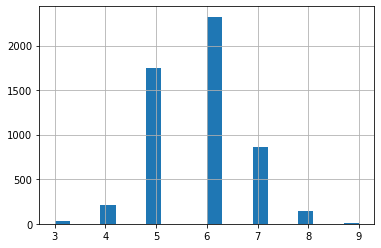

In [21]:
df['quality'].hist(bins=20);

In [23]:
#Since there are very few observations with quality equal to 3, 4, 8 and 9, you can drop these observations from your dataset.

# get data with wine quality greater than 4 and less than 8
df = df[(df['quality'] > 4) & (df['quality'] < 8 )]

# reset index and drop the old one
df = df.reset_index(drop=True)

In [24]:
print(df.alcohol[0])
print(df.alcohol[100])

9.4
10.9


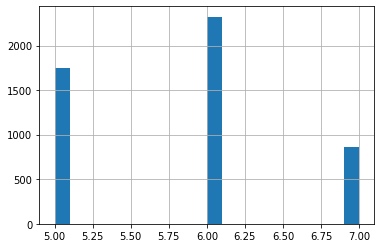

In [25]:
df['quality'].hist(bins=20);

In [26]:
# split df into 80:20 train and test sets
train, test = train_test_split(df, test_size=0.2, random_state = 1)
                               
# split train into 80:20 train and val sets
train, val = train_test_split(train, test_size=0.2, random_state = 1)

In [27]:
train_stats = train.describe()
train_stats.pop('is_red')
train_stats.pop('quality')
train_stats = train_stats.transpose()

In [28]:
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.221616,1.325297,3.80000,6.40000,7.00000,7.7000,15.60000
volatile acidity,3155.0,0.338929,0.162476,0.08000,0.23000,0.29000,0.4000,1.24000
citric acid,3155.0,0.321569,0.147970,0.00000,0.25000,0.31000,0.4000,1.66000
residual sugar,3155.0,5.155911,4.639632,0.60000,1.80000,2.80000,7.6500,65.80000
chlorides,3155.0,0.056976,0.036802,0.01200,0.03800,0.04700,0.0660,0.61100
free sulfur dioxide,3155.0,30.388590,17.236784,1.00000,17.00000,28.00000,41.0000,131.00000
total sulfur dioxide,3155.0,115.062282,56.706617,6.00000,75.00000,117.00000,156.0000,344.00000
density,3155.0,0.994633,0.003005,0.98711,0.99232,0.99481,0.9968,1.03898
pH,3155.0,3.223201,0.161272,2.72000,3.11000,3.21000,3.3300,4.01000
sulphates,3155.0,0.534051,0.149149,0.22000,0.43000,0.51000,0.6000,1.95000


In [29]:
def format_output(data):
    is_red = data.pop('is_red')
    is_red = np.array(is_red)
    quality = data.pop('quality')
    quality = np.array(quality)
    return (quality, is_red)


In [30]:
# format the output of the train set
train_Y = format_output(train)

# format the output of the val set
val_Y = format_output(val)
    
# format the output of the test set
test_Y = format_output(test)

In [31]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
225,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4
3557,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8
3825,8.8,0.27,0.25,5.0,0.024,52.0,99.0,0.99250,2.87,0.49,11.4
1740,6.4,0.45,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8
1221,7.2,0.53,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.9


In [33]:
print(train)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
225             7.5              0.65         0.18  ...  3.38       0.77      9.4
3557            6.3              0.27         0.29  ...  3.14       0.40      8.8
3825            8.8              0.27         0.25  ...  2.87       0.49     11.4
1740            6.4              0.45         0.07  ...  2.97       0.28     10.8
1221            7.2              0.53         0.13  ...  3.21       0.68      9.9
...             ...               ...          ...  ...   ...        ...      ...
1916            7.0              0.21         0.37  ...  3.26       0.56      9.8
606             9.2              0.53         0.24  ...  3.21       0.57      9.5
1255            6.0              0.58         0.20  ...  3.58       0.67     12.5
959             6.8              0.66         0.07  ...  3.29       0.60      9.3
2887            6.0              0.28         0.22  ...  3.20       0.46     10.1

[3155 rows x 11

In [34]:
print(train_Y)

(array([5, 6, 5, ..., 6, 5, 5]), array([1, 0, 0, ..., 1, 1, 0]))


In [35]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']


In [36]:
# normalize the train set
norm_train_X = norm(train)
    
# normalize the val set
norm_val_X = norm(val)
    
# normalize the test set
norm_test_X = norm(test)

In [47]:
input_layer = Input(shape = (11,),name="input_layer")

first_dense = Dense(units = '128', activation='relu',name="first_dense")(input_layer)
drop_out = Dropout(0.2, name="drop_out")(first_dense)

second_dense = Dense(units = '64', activation='relu',name="second_dense")(drop_out)

wine_type = Dense(units='1', activation = 'sigmoid', name="wine_type")(second_dense)

third_dense = Dense(units = '32', activation='relu',name="third_dense")(second_dense)
wine_quality = Dense(units='1',  name="wine_quality")(third_dense)

model = Model(inputs = input_layer, outputs = [wine_quality,wine_type])

print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 11)]         0                                            
__________________________________________________________________________________________________
first_dense (Dense)             (None, 128)          1536        input_layer[0][0]                
__________________________________________________________________________________________________
drop_out (Dropout)              (None, 128)          0           first_dense[0][0]                
__________________________________________________________________________________________________
second_dense (Dense)            (None, 64)           8256        drop_out[0][0]                   
____________________________________________________________________________________________

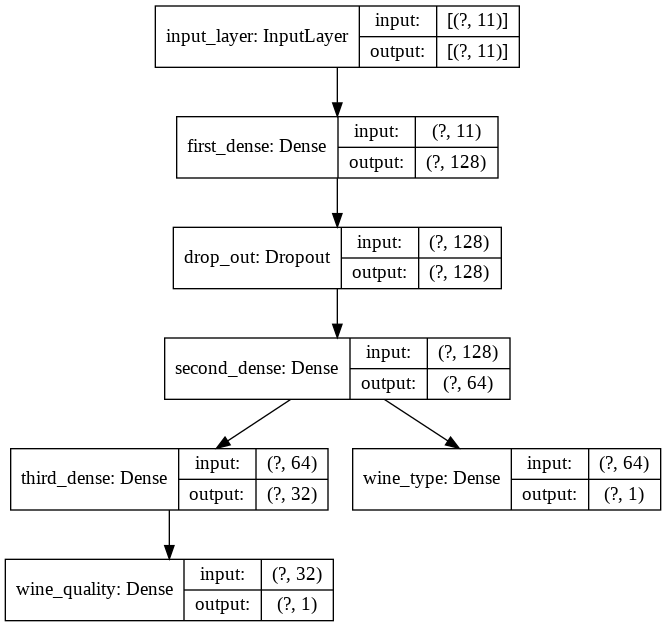

In [48]:
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [49]:
# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={'wine_quality': tf.keras.losses.MeanSquaredError(), 'wine_type': tf.keras.losses.BinaryCrossentropy()},
              metrics={'wine_quality': tf.keras.metrics.RootMeanSquaredError(),
                       'wine_type': tf.keras.metrics.BinaryAccuracy()})

In [52]:
# Train the model for 500 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=100, batch_size=10, validation_data=(norm_val_X, val_Y))

Epoch 1/100
316/316 [==============================] - 2s 6ms/step - loss: 0.2847 - wine_quality_loss: 0.2792 - wine_type_loss: 0.0055 - wine_quality_root_mean_squared_error: 0.5284 - wine_type_binary_accuracy: 0.9984 - val_loss: 0.3758 - val_wine_quality_loss: 0.3407 - val_wine_type_loss: 0.0351 - val_wine_quality_root_mean_squared_error: 0.5837 - val_wine_type_binary_accuracy: 0.9962
Epoch 2/100
316/316 [==============================] - 2s 6ms/step - loss: 0.2844 - wine_quality_loss: 0.2788 - wine_type_loss: 0.0056 - wine_quality_root_mean_squared_error: 0.5280 - wine_type_binary_accuracy: 0.9987 - val_loss: 0.3933 - val_wine_quality_loss: 0.3568 - val_wine_type_loss: 0.0366 - val_wine_quality_root_mean_squared_error: 0.5973 - val_wine_type_binary_accuracy: 0.9962
Epoch 3/100
316/316 [==============================] - 2s 6ms/step - loss: 0.2811 - wine_quality_loss: 0.2768 - wine_type_loss: 0.0043 - wine_quality_root_mean_squared_error: 0.5261 - wine_type_binary_accuracy: 0.9994 - va

In [54]:
predictions = model.predict(norm_test_X)
quality_pred = predictions[0]
type_pred = predictions[1]

In [62]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    #plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)

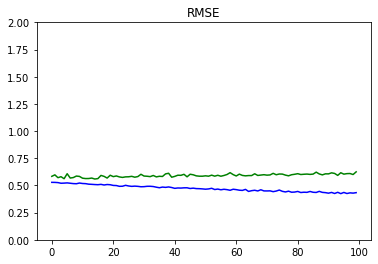

In [55]:
plot_metrics('wine_quality_root_mean_squared_error', 'RMSE', ylim=2)

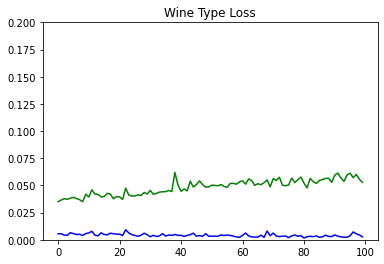

In [56]:
plot_metrics('wine_type_loss', 'Wine Type Loss', ylim=0.2)


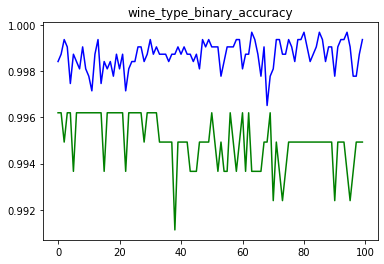

In [63]:

plot_metrics('wine_type_binary_accuracy', 'wine_type_binary_accuracy', ylim=2)